Going to clean up some data for the stock stuff. That means removing games that were sold on multiple consoles, so they have the same release date.

In [257]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio

from statsmodels.graphics.gofplots import qqplot

from scipy import stats
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

In [37]:
main_df = pd.read_csv(r'Data/vg_complete_df.csv')
vg_comp_stock = pd.read_csv(r'Data/VG_Stocks.csv')

In [105]:
vg_df = main_df.copy()

aggregation_functions = {'company' : 'first', 'stock' : 'first', 'console': lambda x: ', '.join(x), 
                        'genre_x': 'first',  
                        'critic_score': 'mean', 'total_sales': 'sum',
                        'user_score': 'mean'}
vg_df = vg_df.groupby(['title', 'release_date_x']).aggregate(aggregation_functions)
vg_df.reset_index(inplace=True)

In [106]:
vg_df['release_date_x']= pd.to_datetime(vg_df['release_date_x'])
vg_df = vg_df.rename(columns = {"release_date_x":"release_date"})
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         3217 non-null   object        
 1   release_date  3217 non-null   datetime64[ns]
 2   company       3217 non-null   object        
 3   stock         3217 non-null   object        
 4   console       3217 non-null   object        
 5   genre_x       3217 non-null   object        
 6   critic_score  3217 non-null   float64       
 7   total_sales   3217 non-null   float64       
 8   user_score    3217 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 226.3+ KB


In [91]:
vg_stock_sym = vg_comp_stock['stock'].unique()
vg_stock_sym

array(['TTWO', '3765.T', 'ATVI', 'EMBRAC-B.ST', 'SGAMY', '7832.T',
       'CCOEF', 'SQNXF', 'EA', '3635.T', '9766.T', 'MSFT', '036570.KS',
       'NTDOY', '950180.KS', '6460.T', 'SONY', 'UBSFY'], dtype=object)

In [107]:
test = yf.Ticker(vg_stock_sym[0])

In [108]:
test = test.history(period="max")

In [109]:
test.reset_index(inplace=True)

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6094 non-null   datetime64[ns]
 1   Open          6094 non-null   float64       
 2   High          6094 non-null   float64       
 3   Low           6094 non-null   float64       
 4   Close         6094 non-null   float64       
 5   Volume        6094 non-null   int64         
 6   Dividends     6094 non-null   float64       
 7   Stock Splits  6094 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 381.0 KB


In [111]:
# test.history(period="max")
vg_test = vg_df[vg_df.stack().str.contains(vg_stock_sym[0]).any(level=0)]

In [100]:
# test2 = pd.concat([test, vg_test], join="left", sort=False)

# test = test.merge(vg_test[['title', 'critic_score', 'total_sales', 'release_date_x', 'user_score']], how = 'left',
#                 left_on = 'Date', right_on = 'release_date_x').drop(columns= ['release_date_x'])

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [112]:
test = test.merge(vg_test[['title', 'critic_score', 'total_sales', 'release_date', 'user_score']], how = 'left',
                left_on = 'Date', right_on = 'release_date')

In [113]:
test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,title,critic_score,total_sales,release_date,user_score
0,1997-04-15,3.666441,3.916425,3.416456,3.916425,1785600,0.0,0.0,NaN,NaN,NaN,NaT,NaN
1,1997-04-16,3.916425,4.166410,3.583112,3.708104,443700,0.0,0.0,NaN,NaN,NaN,NaT,NaN
2,1997-04-17,3.749768,4.083081,3.749768,3.833096,252150,0.0,0.0,NaN,NaN,NaN,NaT,NaN
3,1997-04-18,3.833096,3.999753,3.833096,3.999753,165900,0.0,0.0,NaN,NaN,NaN,NaT,NaN
4,1997-04-21,3.916425,3.999753,3.916425,3.999753,77400,0.0,0.0,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6107,2021-07-19,169.940002,172.229996,166.610001,168.960007,2109700,0.0,0.0,NaN,NaN,NaN,NaT,NaN
6108,2021-07-20,170.910004,171.100006,167.970001,170.020004,861600,0.0,0.0,NaN,NaN,NaN,NaT,NaN
6109,2021-07-21,170.470001,171.570007,170.139999,170.899994,903400,0.0,0.0,NaN,NaN,NaN,NaT,NaN
6110,2021-07-22,170.679993,171.589996,169.199997,171.279999,605600,0.0,0.0,NaN,NaN,NaN,NaT,NaN


In [152]:
vg_test.release_date[:1]
#vg_test.release_date[:1] * 1000
bla = vg_test.release_date[:1]

In [158]:
fig = px.line(test, x="Date", y="Close")
fig.add_vline(x=, line_dash='dash') # , annotation_text=vg_test['release_date']

# fig.add_vline(x=vg_test.index[vg_test['release_date']].tolist(), line_dash='dash') # , annotation_text=vg_test['release_date']
# fig.add_vrect(x0=datetime.datetime(2010,5,27).timestamp() * 1000, x1=datetime.datetime(2013,5,27).timestamp() * 1000,line_dash='dash', annotation_text="hahaha")
fig.show()

TypeError: 'generator' object is not subscriptable

In [164]:
ttwo = vg_df[vg_df['stock'].str.contains('TTWO')]

In [242]:
ttwo_release_list = ttwo[ttwo['critic_score'] > 95]['release_date'].tolist()
ttwo_release


ttwo_release = ttwo[ttwo['critic_score'] > 95]['release_date']
ttwo_release

205    2007-08-21
1040   2008-04-29
1042   2013-09-17
1044   2015-04-14
1051   2002-10-28
2155   2010-11-23
Name: release_date, dtype: datetime64[ns]

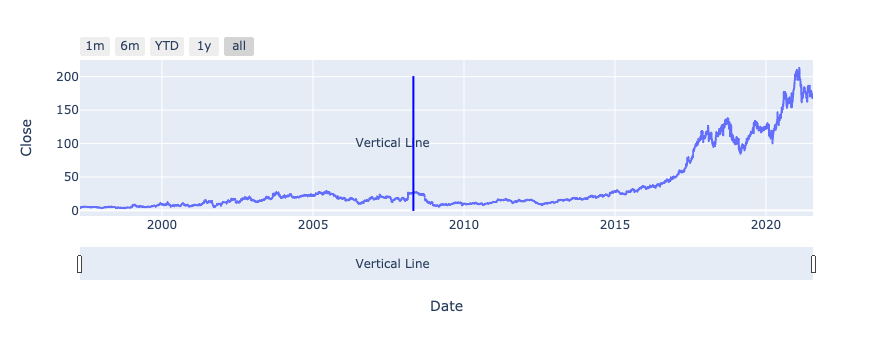

In [251]:
fig = px.line(test, x="Date", y="Close")


# Draw shape (you won't be able to add a hover text for it)
#fig = go.Figure()


# fig.add_shape(
#         type="rect",
#         x0=ttwo_release[0], y0=0,
#         x1=ttwo_release[0], y1=200,
#         fillcolor='LightSkyBlue',
#         line_color='Blue',
#         name='Shape 1',
#         line=dict(
#         color="RoyalBlue",
#         width=2,
#         )
#     )

fig.add_shape(
        type="rect",
        x0=ttwo_release_list[1], y0=0,
        x1=ttwo_release_list[1], y1=200,
        fillcolor='LightSkyBlue',
        line_color='Blue',
        name='Shape 1',
        line=dict(
        color="RoyalBlue",
        width=2,
        )
    )


# Adding a trace with a fill, setting opacity to 0
fig.add_trace(
        go.Scatter(
            x=[ttwo_release_list[0]],
            y=[100],
            fill="toself",
            name='',
            text=["Vertical Line",
                "Horizontal Dashed Line",
                "Diagonal dotted Line"],
            mode="text",
            opacity=1,
            hovertemplate="Testing",
            showlegend=False
        )
    )


shapes = go.layout.Shape(
                type="rect",
                x0=ttwo_release_list['Date'][i],
                y0=data['Max_alt'][i],
                x1='2019-12-31',
                y1=data['Max_ust'][i],
                fillcolor="LightSkyBlue",
                opacity=0.5,
                layer="below",
                line_width=0)] for i in range(len(data))]


# fig.add_trace(
#         go.Scatter(
#             x=[ttwo_release[1]],
#             y=[100],
#             fill="toself",
#             name='',
#             text=[
#                 "Horizontal Dashed Line",
#                 "Diagonal dotted Line"],
#             mode="text",
#             opacity=1,
#             hovertemplate="Testing"
#         )
#     )


## THis works, but not great
# fig.add_trace(go.Scatter(
#     x=ttwo_release,
#     y0= 100,
#     line=dict(color="RoyalBlue",width=1),
#     xperiod="M1",
#     xperiodalignment="middle",
#     hovertemplate="%{y}%{_xother}"
# ))

# # Add shape regions
# fig.add_vrect(
#     x0="2015-02-04", x1="2015-02-06",
#     fillcolor="LightSalmon", opacity=0.5,
#     layer="below", line_width=0,
# ),

# fig.add_vrect(
#     x0="2015-02-20", x1="2015-02-22",
#     fillcolor="LightSalmon", opacity=0.5,
#     layer="below", line_width=0,
# )

# fig.add_shape(type="line",
#     x0=ttwo_release[0], y0=0, x1=ttwo_release[0], y1=200,
#     line=dict(color="RoyalBlue",width=1)
# )


#### This adds the stock view stuff
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
#fig.add_vline(x=ttwo_release[1] * 1000, line_dash='dash', annotation_text="hahaha")
#fig.add_vrect(x0=datetime.datetime(2010,5,27).timestamp() * 1000, x1=datetime.datetime(2013,5,27).timestamp() * 1000,line_dash='dash', annotation_text="hahaha")
fig.show()

In [293]:

# Draw shape (you won't be able to add a hover text for it)
#fig = go.Figure()


shapes = [dict(type='rect',
             x0=dt[k],
             y0=0,
             x1=dt[k+1],
             y1=150,
             fillcolor=colors[k],
             opacity=0.5,
             line_width=0) for k in range(5)]


# for i in ttwo_release:
#     fig.add_shape(
#             type="rect",
#             x0=ttwo_release_list[1], y0=0,
#             x1=ttwo_release_list[1], y1=200,
#             fillcolor='LightSkyBlue',
#             line_color='Blue',
#             name='Shape 1',
#             line=dict(
#             color="RoyalBlue",
#             width=2,
#             )
#         )

#     # Adding a trace with a fill, setting opacity to 0
#     fig.add_trace(
#             go.Scatter(
#                 x=[ttwo_release_list],
#                 y=[100],
#                 fill="toself",
#                 name='',
#                 text=["Vertical Line",
#                     "Horizontal Dashed Line",
#                     "Diagonal dotted Line"],
#                 mode="text",
#                 opacity=1,
#                 hovertemplate="Testing",
#                 showlegend=False
#             )
#         )


# fig = go.Figure(data=[trace], layout=layout)

fig = go.Figure(x=test["Date"], y=test["Close"])
fig.update_layout(title_text='Testing', title_x=0.5,
            hovermode='x',
            shapes=shapes)


## THis works, but not great
# fig.add_trace(go.Scatter(
#     x=ttwo_release,
#     y0= 100,
#     line=dict(color="RoyalBlue",width=1),
#     xperiod="M1",
#     xperiodalignment="middle",
#     hovertemplate="%{y}%{_xother}"
# ))

# # Add shape regions
# fig.add_vrect(
#     x0="2015-02-04", x1="2015-02-06",
#     fillcolor="LightSalmon", opacity=0.5,
#     layer="below", line_width=0,
# ),

# fig.add_vrect(
#     x0="2015-02-20", x1="2015-02-22",
#     fillcolor="LightSalmon", opacity=0.5,
#     layer="below", line_width=0,
# )

# fig.add_shape(type="line",
#     x0=ttwo_release[0], y0=0, x1=ttwo_release[0], y1=200,
#     line=dict(color="RoyalBlue",width=1)
# )


#### This adds the stock view stuff
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
#fig.add_vline(x=ttwo_release[1] * 1000, line_dash='dash', annotation_text="hahaha")
#fig.add_vrect(x0=datetime.datetime(2010,5,27).timestamp() * 1000, x1=datetime.datetime(2013,5,27).timestamp() * 1000,line_dash='dash', annotation_text="hahaha")
fig.show()

TypeError: invalid Figure property: x
x
Bad property path:
x
^

In [208]:
fig = px.Figure()
fig.add_trace(go.Scatter(
    x=test['Date'], # pls, modify accordingly
    y=test['Close'], # pls modify accordingly
    hovertemplate= "Testing this out"
        ))

fig=px.line(test,x='Date',y='Close')
fig.add_trace(go.Scatter(
    x=ttwo_release,
    y=[0, test['Close'].max()],
    mode="lines",
    line=go.scatter.Line(color="red"),
    showlegend=False))
# fig.add_annotation(
#     dict(
#         x= Date,
#         y=df_italy['infection_rate_italy'].max(),
#         text='starting date of lockdown'
#     )
# )
fig.show()

AttributeError: module 'plotly.express' has no attribute 'Figure'

In [180]:
trace = px.line(test, x="Date", y="Close")


shapes = list()
for i in ttwo_release:
    shapes.append({'type': 'line',
                   'xref': 'x',
                   'yref': 'y',
                   'x0': i,
                   'y0': 0,
                   'x1': i,
                   'y1': 'max'})

layout = plotly.graph_objs.Layout(shapes=shapes)
fig = plotly.graph_objs.Figure(data=[trace],
                               layout=layout)
plotly.offline.plot(fig)



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'Date=%{x}<br>Close=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([datetime.datetime(1997, 4, 15, 0, 0),
                          datetime.datetime(1997, 4, 16, 0, 0),
                          datetime.datetime(1997, 4, 17, 0, 0), ...,
                          datetime.datetime(2021, 7, 21, 0, 0),
                          datetime.datetime(2021, 7, 22, 0, 0),
                          datetime.datetime(2021, 7, 23, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([  3.91642523,   3.70810413,   3.83309627, ..., 170.8999939 ,
                          171.27999878, 173.28999329]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Close'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [159]:
fig = px.line(test, x="Date", y="Close")

for r in test.loc[test.title.astype(bool),].iterrows():
    fig.add_vline(x=r[1]["release_date"],  line_width=1, line_dash="solid", line_color="red")
    

fig.show()

KeyboardInterrupt: 

In [132]:
vg_test[~vg_test['release_date'].isna()]

,title,release_date,company,stock,console,genre_x,critic_score,total_sales,user_score
13,24: The Game,2006-02-28,Take Two Interactive,TTWO,PS2,Adventure,62.000000,0.30,82.000000
56,All-Pro Football 2K8,2007-07-16,Take Two Interactive,TTWO,"X360, PS3",Sports,74.000000,0.41,70.500000
66,Amped 3,2005-11-16,Take Two Interactive,TTWO,X360,Sports,72.000000,0.16,71.000000
144,Ball Breakers,2000-07-26,Take Two Interactive,TTWO,PS,Action,68.000000,0.18,53.000000
162,Battleborn,2016-05-03,Take Two Interactive,TTWO,"PS4, XOne, PC",Shooter,69.333333,0.96,69.666667
...,...,...,...,...,...,...,...,...,...
3156,World of Goo,2008-10-21,Take Two Interactive,TTWO,PC,Puzzle,90.000000,0.03,85.000000
3173,XCOM 2,2015-11-30,Take Two Interactive,TTWO,PC,Strategy,88.000000,0.31,71.000000
3174,XCOM 2,2016-09-27,Take Two Interactive,TTWO,"PS4, XOne",Strategy,87.500000,0.50,80.500000
3175,XCOM: Enemy Unknown,2012-10-09,Take Two Interactive,TTWO,"X360, PC, PS3",Sports,89.666667,1.94,82.333333


In [126]:
vg_test[~vg_test['release_date'].isna()]

,title,release_date,company,stock,console,genre_x,critic_score,total_sales,user_score
13,24: The Game,2006-02-28,Take Two Interactive,TTWO,PS2,Adventure,62.000000,0.30,82.000000
56,All-Pro Football 2K8,2007-07-16,Take Two Interactive,TTWO,"X360, PS3",Sports,74.000000,0.41,70.500000
66,Amped 3,2005-11-16,Take Two Interactive,TTWO,X360,Sports,72.000000,0.16,71.000000
144,Ball Breakers,2000-07-26,Take Two Interactive,TTWO,PS,Action,68.000000,0.18,53.000000
162,Battleborn,2016-05-03,Take Two Interactive,TTWO,"PS4, XOne, PC",Shooter,69.333333,0.96,69.666667
...,...,...,...,...,...,...,...,...,...
3156,World of Goo,2008-10-21,Take Two Interactive,TTWO,PC,Puzzle,90.000000,0.03,85.000000
3173,XCOM 2,2015-11-30,Take Two Interactive,TTWO,PC,Strategy,88.000000,0.31,71.000000
3174,XCOM 2,2016-09-27,Take Two Interactive,TTWO,"PS4, XOne",Strategy,87.500000,0.50,80.500000
3175,XCOM: Enemy Unknown,2012-10-09,Take Two Interactive,TTWO,"X360, PC, PS3",Sports,89.666667,1.94,82.333333


In [ ]:
for i in vg_stock_sym

In [275]:
ttwo_releases = ttwo[ttwo['critic_score'] > 95].sort_values(by=['release_date'])

In [276]:
ttwo_releases.index = ttwo_releases['release_date']

In [277]:
del ttwo_releases['release_date']
ttwo_releases

,title,company,stock,console,genre_x,critic_score,total_sales,user_score
release_date,,,,,,,,
2002-10-28,Grand Theft Auto: Vice City,Take Two Interactive,TTWO,PS2,Action,96.0,16.15,87.0
2007-08-21,BioShock,Take Two Interactive,TTWO,"X360, PC",Shooter,96.0,3.24,90.0
2008-04-29,Grand Theft Auto IV,Take Two Interactive,TTWO,"X360, PS3",Action,100.0,21.66,84.5
2010-11-23,Red Dead Redemption: Undead Nightmare,Take Two Interactive,TTWO,"PS3, X360",Action,100.0,2.29,75.0
2013-09-17,Grand Theft Auto V,Take Two Interactive,TTWO,"PS3, X360",Action,95.5,36.18,81.5
2015-04-14,Grand Theft Auto V,Take Two Interactive,TTWO,PC,Action,96.0,1.17,79.0


In [278]:

dt = ["{}-{:02.0f}-{:02.0f}".format(d.year, d.month, d.day) for d in ttwo_releases.index]

In [282]:

colors= ['green', 'rgb(255,215,0)', 'red', 'blue', 'magenta']

shapes = [dict(type='rect',
             x0=dt[k],
             y0=0,
             x1=dt[k+1],
             y1=150,
             fillcolor=colors[k],
             opacity=0.5,
             line_width=0) for k in range(5)]

In [283]:
trace=go.Scatter(
           x=ttwo_releases.index,
           y=ttwo_releases.critic_score,
           mode='lines',
           line=dict(width=3, color='rgb(10,10,10)'),
           name='my data')

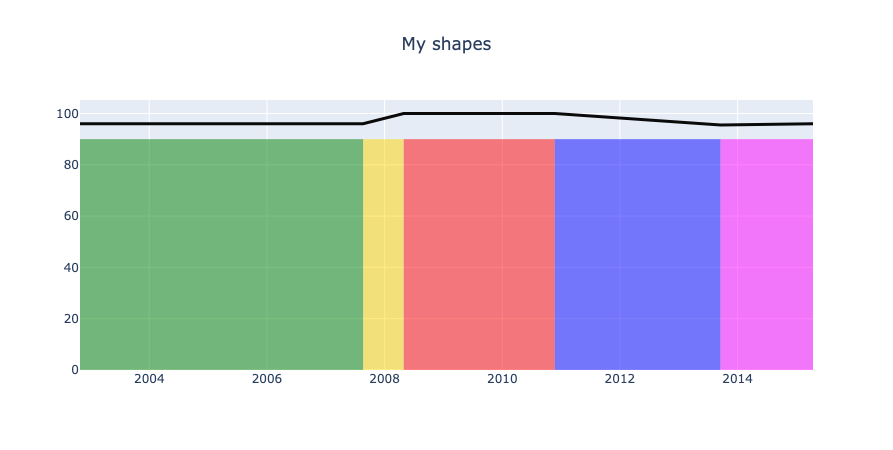

In [284]:
layout = go.Layout(title_text='My shapes', title_x=0.5,
            width=600, height=450,
            hovermode='x',
            shapes=shapes)
fig = go.Figure(data=[trace], layout=layout)
fig.show()